**Variable Compleja. Taller 4 **


**Harold Andres Aguilar Beltran**

Tutorial para graficar funciones complejas racionales en Python, utilizando el metodo del dominio coloreado.

Para visualizar los numeros complejos, vamos a utilizar una funcion color que asocia a cada numero complejo un color determinado. El plano complejo puede visualizarse como una paleta de colores
construida a partir del sistema HSL (del inglés Hue, Saturation, Lightness – Matiz, Saturación,
Luminosidad).
En el plano complejo coloreado, el matiz representa el argumento del número complejo $𝑧$ y la
luminosidad representa el valor módulo|𝑧|. Recordemos que un número complejo se puede representar
en forma polar $𝑧 = 𝑟𝑒^𝑖𝜃$ donde $𝑟 = \sqrt{x^2+y^2}$ denota el módulo y $𝜃$ el argumento 

In [30]:
%matplotlib inline
import math
from math import sinh, cos, sin
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

El primer paso ademas de cargar los paquetes que vamos a utilizar, es definir una funcion para el argumento, es decir el matiz, definida de la siguiente forma:

In [20]:
def Hcomplex(z):# calcula el matiz correspondiente al numero complejo z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

Por ejemplo si utilizamos la funcion g(x)= $(1-\frac{1}{(1+x^2)})^2$. 
Codifiquemos por colores los puntos de la región rectangular dada por: $ D=\{x+iy∈C|x∈[−1,4],y∈[−1,3]\}$ .



In [21]:
def g(x):
    return (1- 1/(1+x**2))**0.2 

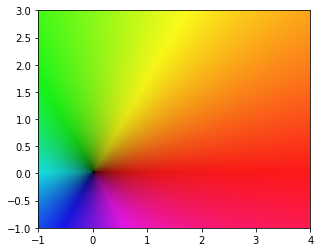

In [22]:
x = np.arange(-1,4, 0.05)
y = np.arange(-1,3, 0.05)
x, y = np.meshgrid(x,y)
z = x + 1j*y
H = Hcomplex(z)
V = g(np.absolute(z))
S = 0.9*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-1, 4, -1, 3])

Para visualizar una función compleja $f$ definida en una región rectangular $[a, b] × [c, d] ⊂\mathbb{C}$, y tomando valores en el plano complejo extendido, $\bar{\mathbb{C}} = \mathbb{C} ∪ \{∞\}$, se procede como sigue:

-Definimos una cuadrícula estrecha de este rectángulo.

-Cada nodo z de la cuadrícula se coloreará con el color HSV $(h, s_0, v)$, donde h y v codifican el argumento y el módulo de $f(z)$ respectivamente.

-Los puntos $z$ para los cuales $| f (z) | = ∞$ podrían colorearse con blanco

Si denotamos por $col: \bar{\mathbb{C}} → HSV$ la función que codifica los puntos en el plano complejo extendido, por una tripla $(h, s, v)$, entonces la coloración del dominio está representada por el mapeo $z↦f (z ) ↦col (f (z))$, es decir, al punto $z$ en el dominio se asocia el código de color de $f (z)$.

In [23]:
def func_vals(f, re, im,  N): #evalúa la función compleja en los nodos de la cuadrícula
    # re e im son tuplas, re = (a, b) e im = (c, d), definiendo la región rectangular
    # N es el número de puntos discretos por intervalo de unidad 
    
    l = re[1]-re[0]
    h = im[1]-im[0]
    resL = N * l # resolucion horizontal(pixeles) 
    resH = N * h # resolucion vertical (pixeles)
    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))
    x, y = np.meshgrid(x,y)
    z = x + 1j*y
    return f(z)

In [24]:
def domaincol_c(w, s):#Coloración de dominio clásico
    # w es la matriz de valores f (z)
    # s es la saturación constante
    
    H = Hcomplex(w)
    S = s * np.ones(H.shape)
    modul = np.absolute(w)
    V = (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0, 0, 1)=(1, 1, 1)=white

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB         

In [25]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], title='',
                s=0.9, N=200, daxis=None):
    w = func_vals(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

Finalmente graficamos la funcion con el siguiente codigo. 
En esta parte del codigo podemos cambiar la funcion a graficar si redefinimos "lambda z" como la funcion racional compleja que queramos para ver su dominio coloreado 

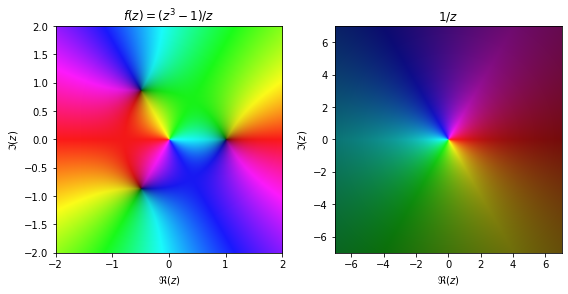

In [26]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1, 2, 1)
f = lambda z: (z**3 - 1)/z
plot_domain(domaincol_c, f, re=ab, im= cd, title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:1/z, re=[-7, 7], im=[-7, 7], title='$1/z$', daxis=True)
plt.tight_layout() 

Mirando la imagen de la izquierda, observamos que los puntos más oscuros se asignan mediante f a puntos cercanos al origen. La función f visualizada aquí tiene tres ceros (las raíces de la unidad) que son puntos negros, y un polo en z = 0 (teóricamente es de color blanco).

**Mas ejemplos de graficas de funciones racionales complejas**

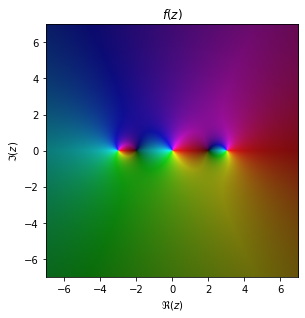

In [49]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1,2,2)
f = lambda z: (z**2- 4)/(z**3 -9*z)
plot_domain(domaincol_c, f, re=[-7, 7], im=[-7, 7], title='$f(z)$', daxis=True)
plt.tight_layout()

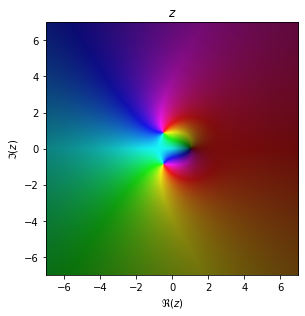

In [48]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:(z-1)/(z**2+z+1), re=[-7, 7], im=[-7, 7], title='$z$', daxis=True)
plt.tight_layout()

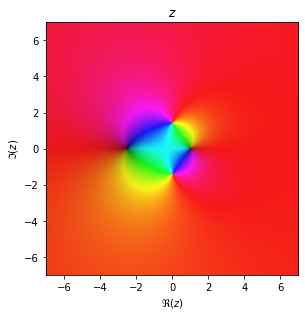

In [47]:
plt.rcParams['figure.figsize'] = 8, 5
ab = [-2, 2]
cd = [-2, 2]
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:(2*z**2 +3*z -5)/(z**2+2), re=[-7, 7], im=[-7, 7], title='$z$', daxis=True)
plt.tight_layout()